
# **Introducción a Python para Análisis de Datos**
## Capítulo 5: Análisis Exploratorio de Datos (EDA)
---
**Autor:** Juan Martin Bellido  

**Descripción**  
El análisis exploratorio de datos, o EDA por sus siglas en inglés, es la aplicación de técnicas de estadística descriptiva para examinar un conjunto de datos. La visualización de datos, es decir, los gráficos, son una herramienta fundamental para el EDA. Solemos utilizar gráficos sencillos, ya que el objetivo principal es permitirnos llegar a conclusiones y no necesariamente conservar o exportar estas visualizaciones.

**¿Feedback? ¿comentarios?** Por favor compártelo conmigo escribiéndome por [LinkedIn](https://www.linkedin.com/in/jmartinbellido/)  

**Material Adicional**

* [Guía Python Importar/Exportar DataFrames](https://datawizards.es/contenido/codigo-para-analisis-de-datos/guias/python-importar-exportar)
* [Comandos Jupyter Notebook](https://datawizards.es/contenido/codigo-para-analisis-de-datos/guias/comandos-rapidos-jupyter)
* [Sintaxis Markdown](https://datawizards.es/contenido/codigo-para-analisis-de-datos/guias/sintaxis-markdown)



## INDICE
---
1. Explorar Series Temporales
2. Explorar Frecuencia
3. Explorar Correlación
4. Explorar Distribución
5. Ejercicios


Convenciones utilizadas en este documento
> 👉 *Esto es una nota u observación*

> ⚠️ *Esto es una advertencia*

In [ ]:
# cargamos librerías (instalamos en caso de ser necesario)
import pandas as pd
import seaborn as sn
import scipy
from pandas.plotting import scatter_matrix

In [ ]:
# utilizamos la siguiente magic function de Jupyter para desplegar gráficos
%matplotlib inline

# 1. Explorar Series Temporales
---
En una serie temporal, estudiamos la evolución de una variable numérica a lo largo del tiempo. *Ejemplo: entender cómo ha evolucionado la facturación y presupuestos de películas de James Bond a lo largo del tiempo.*




In [ ]:
# importamos df
df_jamesbond = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/jamesbond.csv")
df_jamesbond.dtypes

Film                  object
Year                   int64
Actor                 object
Director              object
Box Office           float64
Budget               float64
Bond Actor Salary    float64
dtype: object

### Gráfico de serie temporal

Pandas incluye una serie de métodos que permiten graficar datos de forma simplificada. Este método integra y simplifica comandos propios de librerías más complejas de utilizar (principalmente *matplotlib*).

```
df.plot(kind='line',x,y)
```
> 👉 El mismo método *.plot()* nos permitirá generar una gran variedad de visualizaciones, editando el parámetro *kind*



#### Versión 1
Utilizamos el método (pandas) `.plot()` para visualizar un gráfico de serie temporal.

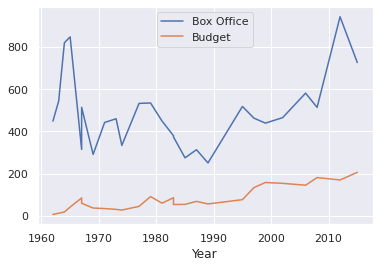

In [ ]:
# Versión 1
df_jamesbond.plot(
    kind='line'                 # especificamos el tipo de gráfico
    ,x='Year'                   # eje X
    ,y=["Box Office","Budget"]  # eje Y
)

#### Versión 2
Editamos parámetros opcionales para mejorar la visualización.

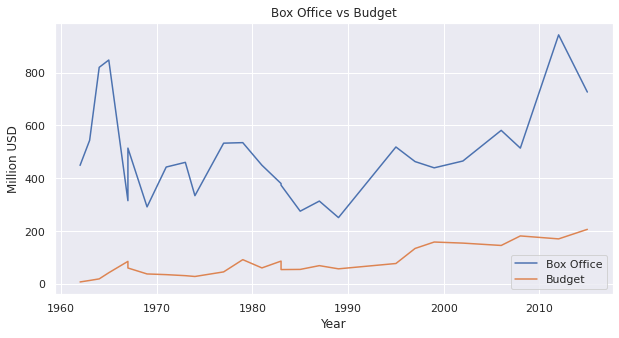

In [ ]:
# Versión 2
df_jamesbond.plot(
    kind='line'
    ,x='Year'
    ,y=["Box Office","Budget"]
    ,figsize=(10,5)                           # modificamos tamaño
    ,title='Box Office vs Budget'             # agregamos título
    ,ylabel = 'Million USD'                   # titulo eje Y
    ,xlabel = 'Year'                          # titulo eje x
)

#### Versión 3

A continuación, editamos el parámetro `subplots` para separar cada serie en un gráfico independiente. Cada variable pasa a tener su propia escala y esto nos permite entender mejor sus variaciones, principalmente en casos donde las variables tengan escalas muy diferentes.



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e4f5c0e90>],
      dtype=object)

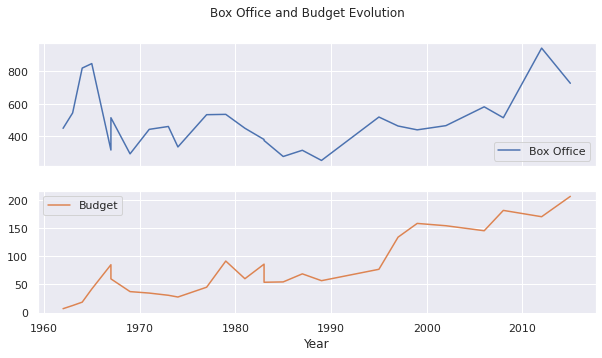

In [ ]:
# Versión 3
df_jamesbond.plot(
    kind='line'
    ,x='Year'
    ,y=["Box Office","Budget"]
    ,figsize=(10,5)                           # modificamos tamaño
    ,title='Box Office and Budget Evolution'  # agregamos título
    ,subplots=True                            # separamos variables en gráficos independientes
    ,layout=(2,1)                             # decidimos cómo orientar nuestros subplots
)

### Exportar un gráfico

Para exportar un gráfico generado en nuestro entorno, utilizaremos los métodos .get_figure() y .savefig(). Al utilizarlos, exportaremos un gráfico a nuestro directorio en formato imagen.

> ⚠️ Esta opción no funciona en caso de haber utilizado `subplots`



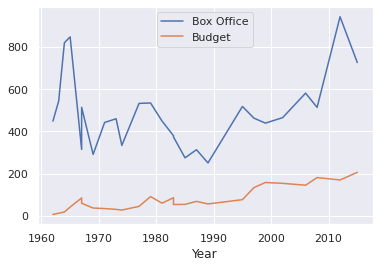

In [ ]:
# generamos un gráfico y lo almacenamos en un objeto
plot = df_jamesbond.plot(
    kind='line'                 
    ,x='Year'                   
    ,y=["Box Office","Budget"]  
)

# anidamos los métodos .get_figure() y .savefig() para exportar gráfico como imágen 
plot.get_figure().savefig('my_chart.png')

# 2. Explorar Frecuencia
---
Al explorar frecuencia, buscamos entender la cantidad de veces que se repite un determinado valor en una variable categórica. *Ejemplo: conocer en cúantas películas de James Bond a trabajado cada director.*



In [ ]:
# importamos df
df_jamesbond = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/jamesbond.csv",index_col="Film")

### Funciones para frecuencia


El método de pandas `.describe()` aplicado a una variable categórica permite obtener información básica sobre frecuencia: *cantidad de observaciones, valores únicos y valor con frecuencia mayor (moda)*.


In [ ]:
# generamos información básica sobre una variable categórica
df_jamesbond["Director"].describe()

count            26
unique           13
top       John Glen
freq              5
Name: Director, dtype: object

In [ ]:
# podríamos aplicarlo a más de una variable categórica
df_jamesbond[["Director","Actor"]].describe()

,Director,Actor
count,26,26
unique,13,7
top,John Glen,Sean Connery
freq,5,7



El método de pandas `value_counts()` permite obtener la frecuencia para cada valor único de la muestra. *Ej. la cantidad de películas para cada uno de los directores.*

El parámetro `normalize = True` pemite obtener la frecuancie en términos relativos. *Ej. porcentaje en el total de películas para cada director.*


In [ ]:
# obtenemos la frecuencia en valor absoluto
df_jamesbond["Director"].value_counts()

John Glen             5
Guy Hamilton          4
Terence Young         3
Lewis Gilbert         3
Martin Campbell       2
Sam Mendes            2
Ken Hughes            1
Peter R. Hunt         1
Irvin Kershner        1
Roger Spottiswoode    1
Michael Apted         1
Lee Tamahori          1
Marc Forster          1
Name: Director, dtype: int64

In [ ]:
# obtenemos la frecuencia relativa
df_jamesbond["Director"].value_counts(normalize=True)

John Glen             0.192308
Guy Hamilton          0.153846
Terence Young         0.115385
Lewis Gilbert         0.115385
Martin Campbell       0.076923
Sam Mendes            0.076923
Ken Hughes            0.038462
Peter R. Hunt         0.038462
Irvin Kershner        0.038462
Roger Spottiswoode    0.038462
Michael Apted         0.038462
Lee Tamahori          0.038462
Marc Forster          0.038462
Name: Director, dtype: float64

In [ ]:
# podemos obtener la frecuancia para combinaciones de más de una variable categórica
df_jamesbond[["Director","Actor"]].value_counts()

Director            Actor         
Terence Young       Sean Connery      3
John Glen           Roger Moore       3
Lewis Gilbert       Roger Moore       2
Sam Mendes          Daniel Craig      2
Guy Hamilton        Sean Connery      2
                    Roger Moore       2
John Glen           Timothy Dalton    2
Lee Tamahori        Pierce Brosnan    1
Ken Hughes          David Niven       1
Marc Forster        Daniel Craig      1
Martin Campbell     Daniel Craig      1
                    Pierce Brosnan    1
Michael Apted       Pierce Brosnan    1
Peter R. Hunt       George Lazenby    1
Roger Spottiswoode  Pierce Brosnan    1
Irvin Kershner      Sean Connery      1
Lewis Gilbert       Sean Connery      1
dtype: int64

### Gráfico de barra

Para visualizar frecuencia solemos utilizar dos tipos de gráficos, *de barra y circular (de tarta)*; este último no es recomendable, ya que suele resultar dificil distinguir áreas.


```
df.plot(kind='bar',x,y)
```


#### Versión 1

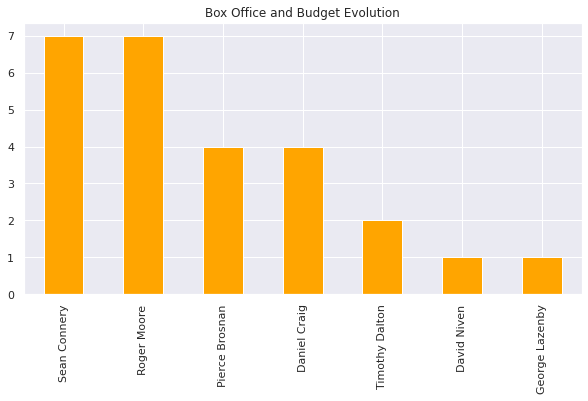

In [ ]:
# a continuación, utilizaremos un gráfico de barra (vertical) para visualizar frecuencia
# primero generamos la frecuencia utilizando el método .value_counts()
df_jamesbond["Actor"].value_counts().plot(
    kind = 'bar'                              # aquí el tipo de gráfico es 'bar'
    ,x='Actor'
    ,figsize=(10,5)                           
    ,title='Box Office and Budget Evolution'  
    ,color='orange'                           # cambiamos color  
    )

#### Versión 2

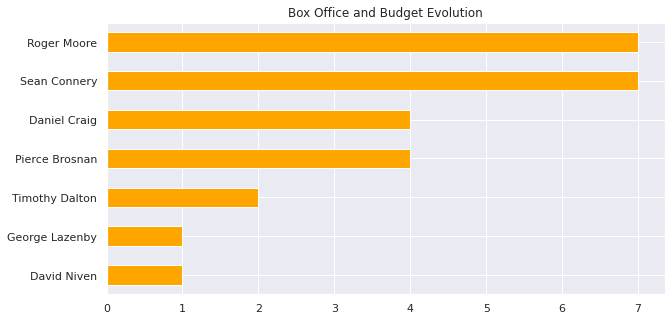

In [ ]:
# a continuación, utilizaremos un gráfico de barra vertical
df_jamesbond["Actor"].value_counts().sort_values().plot(
    kind = 'barh'                               # kind cambia a 'barh'
    ,x='Actor'
    ,figsize=(10,5)                           
    ,title='Box Office and Budget Evolution'  
    ,color='orange'                            
    )

# 3. Explorar Correlación
---
Al explorar correlación, buscamos medir el grado de asociación y entender la dirección entre dos variable numéricas. *Ejemplo: cual es la relación entre el presupuesto de una película y su facturación.*


In [ ]:
# importamos df
df_jamesbond = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/jamesbond.csv")

### Funciones para correlación


La función `scipy.stats.pearsonr(x,y)` permite obtener la correlación (Pearson) entre dos variables continuas.

> 👉 También proporciona el p-value para la prueba de hipótesis de que no existe correlación entre las variables (H0: r=0%).



In [ ]:
# obtenemos la correlación entre dos variables continuas en nuestro DataFrame
# el tipo de correlación utilizada es pearson
scipy.stats.pearsonr(df_jamesbond["Box Office"],df_jamesbond["Budget"])
# nota: el grado de correlación entre las variables seleccionadas es positivo y bajo (28%)

(0.28318466575203255, 0.1609638785608065)


El método pandas `.corr()` nos permite construir una matrix de correlación; se trata de una matrix que nos permite visualizar el coeficiente de correlación para cada combinación disponible entre variables numéricas.

> 👉 La diagonal en una matrix de correlación siempre es 100%, ya que indica la correlación entre una variable consigo misma.


In [ ]:
# a continuación, construiremos una matrix de correlación para evaluar la correlación entre todas las variables continuas
df_jamesbond[["Box Office","Budget","Bond Actor Salary"]].corr()
# las variables con mayor grado de correlación son "Budget" y "Bond Actor Salary"

,Box Office,Budget,Bond Actor Salary
Box Office,1.000000,0.283185,0.069542
Budget,0.283185,1.000000,0.728390
Bond Actor Salary,0.069542,0.728390,1.000000


### Gráfico de dispersión

La opción más clara para visualizar correlación es por medio de un gráfico de dispersión.

#### Versión 1

Comenzamos graficando un gráfico de dispersión sencillo utilizando pandas `.plot(x,y,kind="scatter")`.




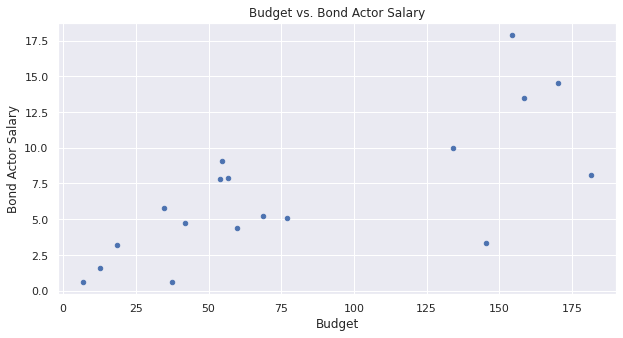

In [ ]:
# utilizamos el método plot(), especificando dos variables numéricas para realizar un gráfico de dispersión
df_jamesbond.plot(
    kind="scatter"               # especificamos dispersión
    ,x="Budget"
    ,y="Bond Actor Salary"
    ,title='Budget vs. Bond Actor Salary'
    ,figsize=(10,5) 
)

#### Versión 2

A continuación, utilizaremos la librería Seaborn para realizar un gráfico de dispersión más avanzado con `sn.relplot()`.

> 👉 *Seaborn* utiliza funciones específicas para cada tipo de gráfico (no un método genérico como Pandas).

> 👉 La librería *Seaborn*, al igual que *Pandas*, es un *wrapper* de la librería *Matplotlib*. Esto significa que funcionan utilizando de fondo esta última, que tiene una sintaxis más compleja.

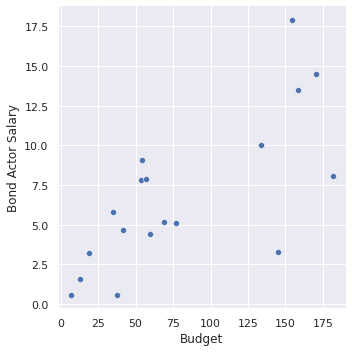

In [ ]:
# comenzamos con la versión más básica 
sn.relplot(
    x="Budget",
    y="Bond Actor Salary",
    data=df_jamesbond
)

El parámetro `hue` permite distinguir observaciones por color para distintos valores de una variable categórica.

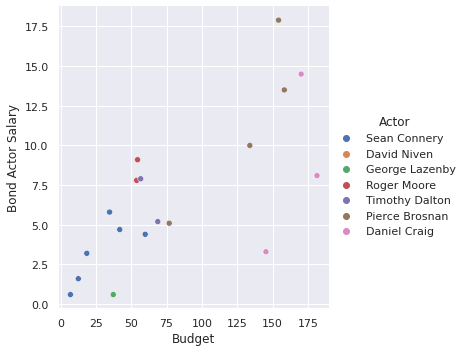

In [ ]:
# añadimos una nueva dimensión al análisis, al distinguir observaciones por actor utilizando colores
sn.relplot(
    x="Budget",
    y="Bond Actor Salary",
    data=df_jamesbond,
    hue="Actor"             # añadimos el parámetro hue
)

El parámetro `col` permite generar gráficos independientes según una variable categórica.

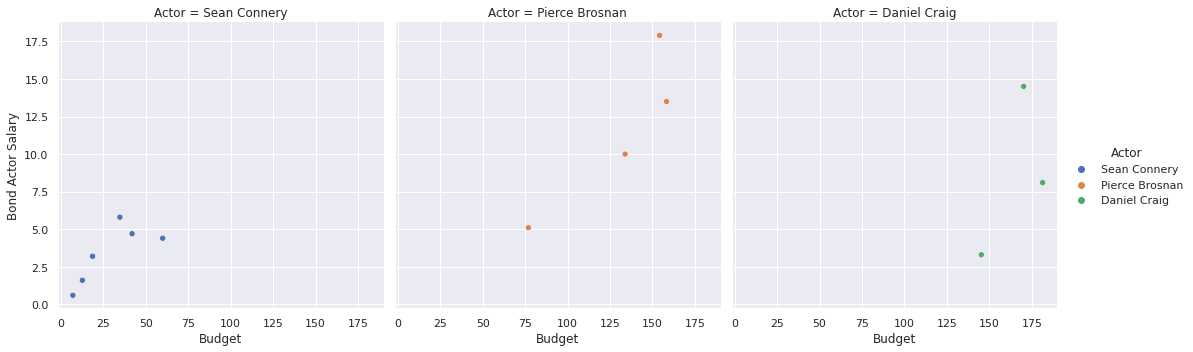

In [ ]:
# filtramos observaciones
cond = df_jamesbond['Actor'].isin(['Sean Connery','Pierce Brosnan','Daniel Craig'])

# graficamos, utilizando el parámetro col
sn.relplot(
    x="Budget",
    y="Bond Actor Salary",
    data=df_jamesbond[cond],
    hue="Actor",
    col="Actor"
)

### Gráfico de calor (heatmap)


Los gráficos de calor (heatmaps) nos permiten visualizar fácilmente matrices de dispersión. Para gráficar un heatmap, utilizaremos la función (Seaborn) `sn.heatmap()`.





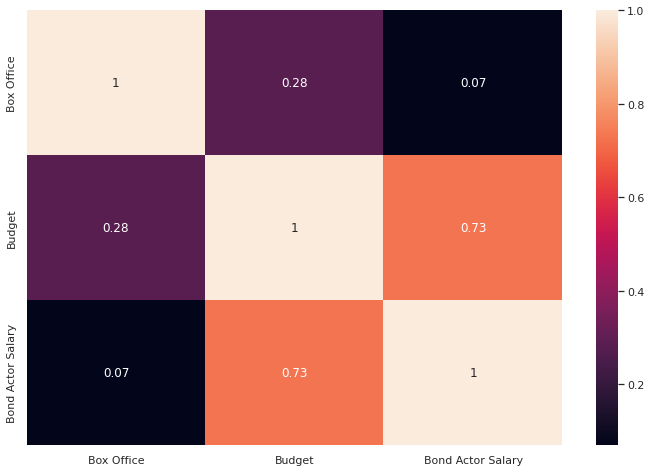

In [ ]:
# la siguiente línea de código permite editar el tamaño de los gráficos propios de la librería seaborn (sn)
sn.set(rc={'figure.figsize':(12,8)}) # cambiamos tamaño
# para visualizar una matriz de correlación, podemos utilizar un gráfico de tipo "heatmap"
corrMatrix= df_jamesbond[["Box Office","Budget","Bond Actor Salary"]].corr()
sn.heatmap(corrMatrix, annot=True) # utilizamos la librearía seaborn para realizar un heatmap

# 4. Explorar Distribución
---

Al estudiar distribución, buscamos interpretar y medir cuán concentrada o dispersa se encuentra una variable numérica en una muestra. *Ej. el peso o altura de un grupo de personas.* 



In [ ]:
# importamos df
df_jamesbond = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/jamesbond.csv")

### Funciones para distribución


El método *.describe()* permite obtener métricas de distribución para variables numéricas en un DataFrame.

> 👉 Por defecto, el método reporta métricas de distribución según cuartiles. Esto se puede editar utilizando el parámetro `percentiles`.

In [ ]:
# seleccionamos variables continuas y analizamos su distribución
df_jamesbond[["Box Office","Budget","Bond Actor Salary"]].describe()

,Box Office,Budget,Bond Actor Salary
count,26.000000,26.000000,18.000000
mean,491.611538,80.719231,6.850000
std,176.740396,57.097608,4.805175
min,250.900000,7.000000,0.600000
25%,375.350000,38.450000,3.575000
50%,461.750000,60.050000,5.500000
75%,534.500000,123.300000,8.850000
max,943.500000,206.300000,17.900000


In [ ]:
# a continuación, editamos la distribución para poder verla en deciles
df_jamesbond[['Box Office','Budget','Bond Actor Salary']].describe(
    percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9] # especificamos cómo queremos la distribución
  )

,Box Office,Budget,Bond Actor Salary
count,26.000000,26.000000,18.000000
mean,491.611538,80.719231,6.850000
std,176.740396,57.097608,4.805175
min,250.900000,7.000000,0.600000
10%,302.500000,23.150000,1.300000
20%,334.000000,34.700000,3.240000
30%,409.750000,43.500000,4.430000
40%,448.800000,54.500000,5.020000
50%,461.750000,60.050000,5.500000
60%,514.200000,76.900000,7.820000


### Graficar un histograma 


Los histogramas son una de las posibilidades que tenemos para estudiar distribución. Aquí dividimos la variable numérica en rangos o intervalos, luego visualizamos la frecuencia para cada uno de ellos. Cada intervalo se corresponde con una barra.

Utilizaremos `plot(kind='hist')` para graficar un histograma.

> 👉 En histogramas, hablamos de *bins* para referirnos a la cantidad de intervalores que estamos utilizando para dividir nuestra muestra. Por defecto, esta función utiliza `bins = 10`, es decir, divide la muestra en 10 intervalos.

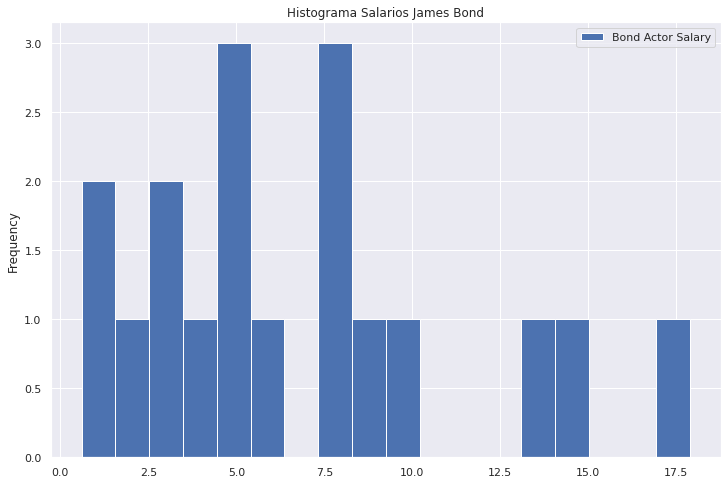

In [ ]:
# seleccionamos una variable continua y graficamos un histograma
df_jamesbond.plot(
    kind='hist',
    y='Bond Actor Salary',
    bins=18,                # dividimos nuestra muestra en 18 grupos (intervalos)
    title='Histograma Salarios James Bond'
)

### Gráfico de densidad


Los gráficos de densidad son la versión armonizada de los histogramas. Se basan en estimaciones y expresan probabilidad. 

> 👉 La *densidad* es técnicamente la probabilidad relativa de que una variable tome un determinado valor.

#### Versión 1
Realizamos un gráfico de densidad sencillo utiliando `.plot(kind='density')`.

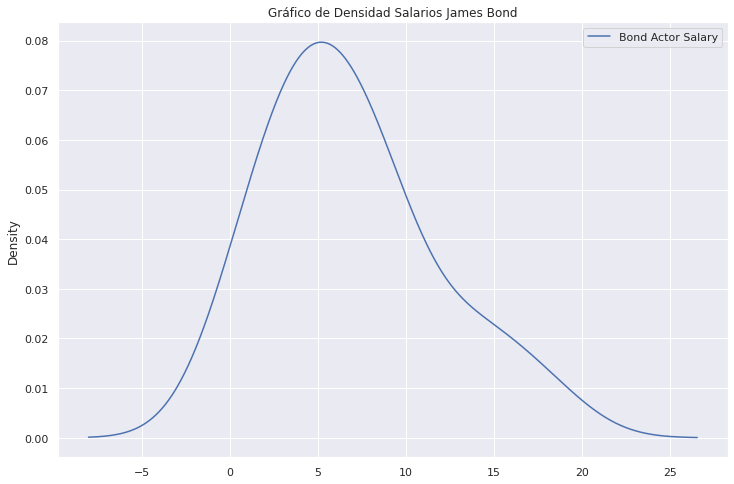

In [ ]:
# seleccionamos una variable continua y graficamos un gráfico de densidad
df_jamesbond.plot(
    kind='density',
    y='Bond Actor Salary',
    title='Gráfico de Densidad Salarios James Bond'
)

#### Versión 2
Podemos comparar distribuciones según una variable categórica utilizando Seaborn.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


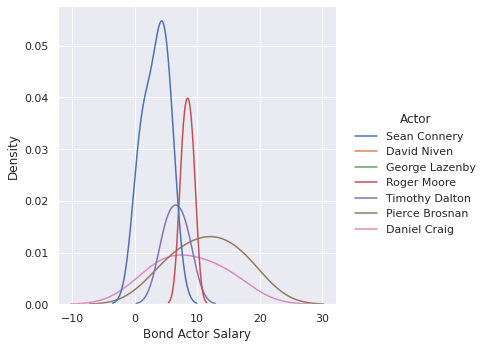

In [ ]:
# comparamos distribuciones de salario para cada actor
sn.displot(
    df_jamesbond,
    kind='kde',
    x='Bond Actor Salary',
    hue='Actor'
)

### Gráfico boxplot


Un boxlot permite estudiar la distribución según cuartiles. A su vez, permite fácilmente comparar distribuciones según una variable categórica. *Ej. comparar la distribución de salarios para cada actor de James Bond.*



#### Versión 1

Podemos gráficar una versión sencilla de un boxplot con `.plot(kind='box')`.


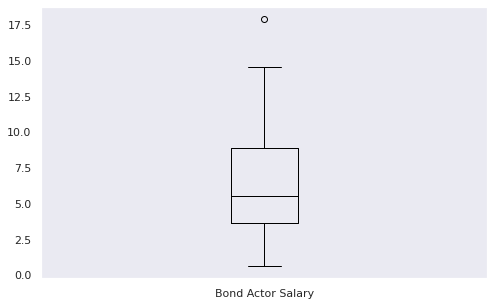

In [ ]:
# graficamos un boxplot
df_jamesbond.plot(
    kind = 'box'
    ,y = 'Bond Actor Salary'
    ,grid = False
    ,color = 'black'
    ,figsize=(8,5)
)

#### Versión 2

Los boxplots nos permiten fácilmente comparar distribuciones para valores distintos de una variable categórica. 

Vamos a proceder a graficar un boxplot más complejo utilizando el método de Pandas `.boxplot()`, específicamente diseñado para este tipo de gráficos.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


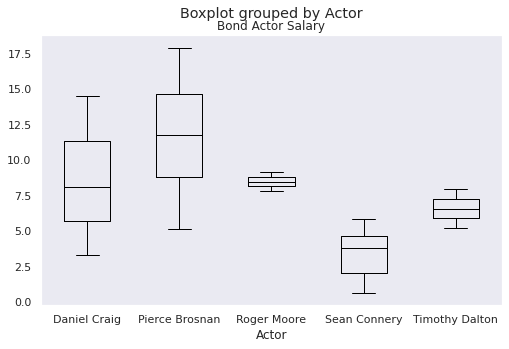

In [ ]:
# a continuación, graficamos un boxplot para visualizar la distribución por grupos de una variable categórica
# creamos una condición para seleccionar ciertos actores
cond = df_jamesbond["Actor"].isin(['Sean Connery','Daniel Craig','Roger Moore','Pierce Brosnan','Timothy Dalton'])
# graficamos un boxplot
df_jamesbond[cond].boxplot(
    by ='Actor'
    ,column ='Bond Actor Salary'
    ,grid = False
    ,color = 'black'
    ,figsize=(8,5)
)

### Gráfico de distribución acumulativa

Un gráfico de distribución acumulativa, o ECDF por sus siglas en ingés, permite visualizar los valores acumulados de una variable para un porcentaje de las observaciones. *Ej. el 40% de las películas han facturado X o menos.*

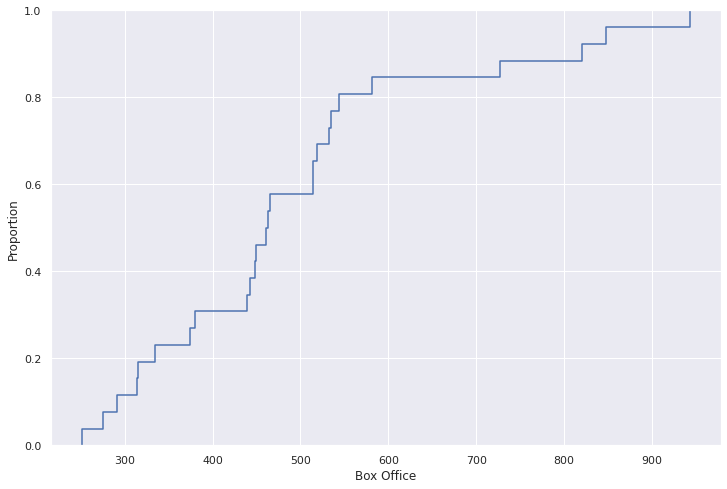

In [ ]:
# graficamos un ECDF utilizando Seaborn
sn.ecdfplot(df_jamesbond['Box Office'])

### Matriz de dispersión



Una matriz de dispersión es una visualización particular, que permite integrar histogramas y gráficos de dispersión para cada combinación entre variables numéricos integrándolas en forma de matriz. Es un recurso muy útil para explorar muchas variables numéricas de forma sencilla.


In [ ]:
# importamos df
df_jamesbond = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/jamesbond.csv",index_col="Film")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e4ec8ed50>,
      dtype=object)

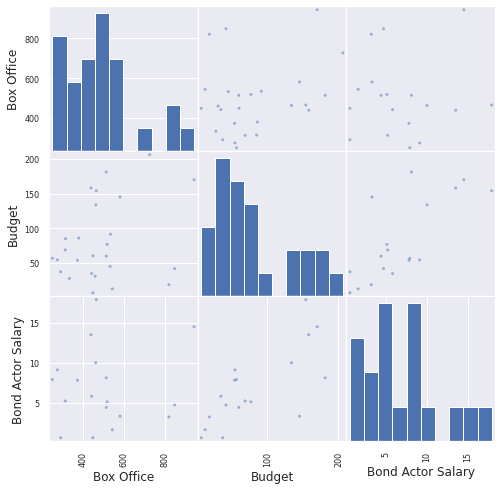

In [ ]:
# graficamos una matriz de dispersión para estudiar la distribución y el grado de asosciacón entre las variables numéricas
scatter_matrix(df_jamesbond[['Box Office','Budget','Bond Actor Salary']],figsize=(8,8))

# 5. Ejercicios
---
> 👉 Puedes encontrar las soluciones a los ejercicios [aquí](https://nbviewer.org/github/jmartinbellido/Python-Curso-Introductorio/blob/main/Capitulo%205%20Ejercicios.ipynb)

### Ejercicio #1

¿Cómo ha evolucionado la cotización "High" de las acciones desde el 2017?
> Dataset https://data-wizards.s3.amazonaws.com/datasets/amzn_stocks.csv


In [ ]:
# importamos librerías
import pandas as pd
import seaborn as sn
import scipy
from pandas.plotting import scatter_matrix

In [ ]:
# importamos df
df_amzn = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/amzn_stocks.csv")
df_amzn.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

### Ejercicio #2

Analizar la relación entre número de empleados (*Employees*) y facturación (*Revenue*) para las empresas de los sectores: *Energy, Aerospace & Defense y Hotels, Resturants & Leisure*. Visualizar gráfico de dispersión utilizando Seaborn, generando un gráfico por sector.

> Dataset https://data-wizards.s3.amazonaws.com/datasets/fortune1000.csv



In [ ]:
# importamos librerías
import pandas as pd
import seaborn as sn
import scipy
from pandas.plotting import scatter_matrix

In [ ]:
df_fortune = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/fortune1000.csv")
df_fortune.dtypes

Rank          int64
Company      object
Sector       object
Industry     object
Location     object
Revenue       int64
Profits       int64
Employees     int64
dtype: object

### Ejercicio #3

Generar un gráfico de densidad para comparar la distribución de la variable IMDB score para los 5 directores con mayor número de películas.

> 👉 Buscamos visualizar la distribución específica para cada uno de los 5 directores.

> Dataset https://data-wizards.s3.amazonaws.com/datasets/movies.csv



In [ ]:
# importamos librerías
import pandas as pd
import seaborn as sn
import scipy
from pandas.plotting import scatter_matrix

In [ ]:
# importamos df
df_movies = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/movies.csv")
df_movies.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

### Ejercicio #4

¿Qué podemos decir acerca de la distribución del PIB per cápita en cada continente? Graficar un boxplot.

> Dataset https://data-wizards.s3.amazonaws.com/datasets/dataset_na_who.csv

In [ ]:
# importamos librerías
import pandas as pd
import seaborn as sn
import scipy
from pandas.plotting import scatter_matrix

In [ ]:
# importamos df
df_who = pd.read_csv('https://data-wizards.s3.amazonaws.com/datasets/dataset_na_who.csv')
df_who.dtypes

Country                                                    object
CountryID                                                   int64
ContinentID                                                 int64
Adolescent fertility rate (%)                             float64
Adult literacy rate (%)                                   float64
Gross national income per capita (PPP international $)    float64
Net primary school enrolment ratio female (%)             float64
Net primary school enrolment ratio male (%)               float64
Population (in thousands) total                           float64
Population annual growth rate (%)                         float64
Population in urban areas (%)                             float64
Population living below the poverty line                  float64
Continent                                                  object
dtype: object

### Ejercicio #5

##### EX 5.A: ¿Cuántos directores hay incluidos en el dataset?
##### EX 5.B: Extraer top 10 variables, según correlación con variable *IMDB score*

> Dataset https://data-wizards.s3.amazonaws.com/datasets/movies.csv



In [ ]:
# importamos librerías
import pandas as pd
import seaborn as sn
import scipy
from pandas.plotting import scatter_matrix

In [ ]:
# importamos df
df_movies = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/movies.csv")
df_movies.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m